In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/nithy/anaconda3/breast/breast-cancer-wisconsin_sample removed.csv")
df.head()

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump thickness              699 non-null    int64 
 1   uniformity of cell size      699 non-null    int64 
 2   uniformity of cell shape     699 non-null    int64 
 3   marginal adhesion            699 non-null    int64 
 4   single epithelial cell size  699 non-null    int64 
 5   bare nuclei                  699 non-null    object
 6   bland chromatin              699 non-null    int64 
 7   normal nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [4]:
# Checking unique values in each column
df.nunique()

clump thickness                10
uniformity of cell size        10
uniformity of cell shape       10
marginal adhesion              10
single epithelial cell size    10
bare nuclei                    11
bland chromatin                10
normal nucleoli                10
mitoses                         9
class                           2
dtype: int64

In [5]:
# Creating numerical columns
num_cols=['clump thickness','uniformity of cell size','uniformity of cell shape','marginal adhesion','single epithelial cell size','bland chromatin','normal nucleoli','mitoses','class']
cat_cols=['bare nuclei']

In [6]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
clump thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniformity of cell size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniformity of cell shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single epithelial cell size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [7]:
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

1     0.575107
10    0.188841
2     0.042918
5     0.042918
3     0.040057
8     0.030043
4     0.027182
?     0.022890
9     0.012876
7     0.011445
6     0.005722
Name: bare nuclei, dtype: float64
****************************************


In [8]:
df.drop(df.index[df['bare nuclei'] == '?'], inplace=True)

In [9]:
df

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


<AxesSubplot:>

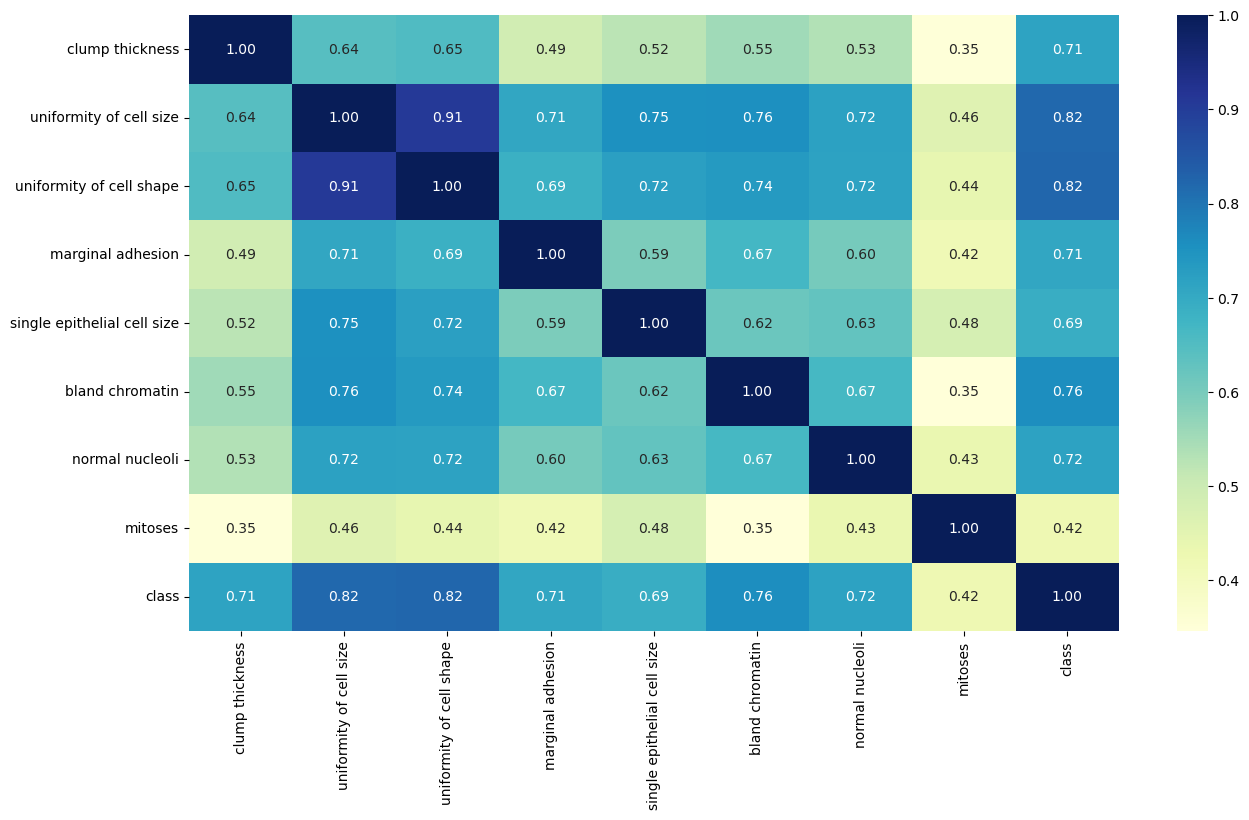

In [10]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [11]:
#since class is a reserved word in python i renamed it
df.rename(columns={'class': 'outcome'}, inplace=True)
# Separating target variable and other variables

Y= df.outcome
X= df.drop(columns = ['outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [12]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       311
           4       0.96      0.96      0.96       167

    accuracy                           0.97       478
   macro avg       0.97      0.97      0.97       478
weighted avg       0.97      0.97      0.97       478



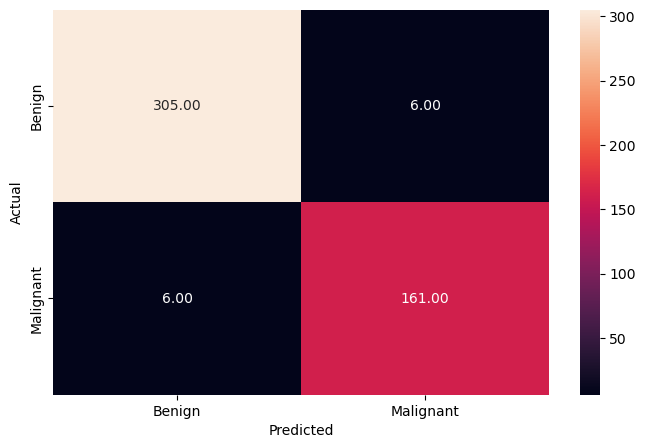

In [13]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       133
           4       0.94      0.93      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



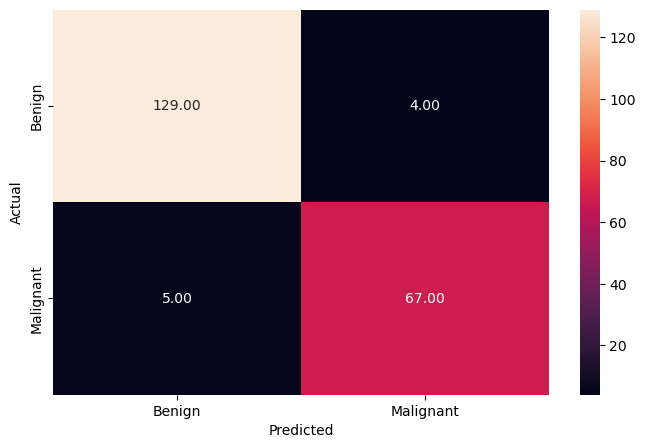

In [14]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [15]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
clump thickness,1.385271
bare nuclei,1.385089
uniformity of cell size,0.941708
bland chromatin,0.765994
marginal adhesion,0.715280
uniformity of cell shape,0.600703
single epithelial cell size,0.444535
mitoses,0.410970
normal nucleoli,0.126368
